In [ ]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)
# from reformat_column import *
import seaborn as sns

# need to switch to csv
# Load the CSV file
file_path = 'Resources/data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)



ImportError: cannot import name 'format_ticks' from 'reformat_column' (/Users/quinton/Desktop/srccode/project-1/reformat_column.py)

##### Data Cleaning and Setup

In [4]:
# Select relevant columns
columns_to_select=['Track', 'Album Name', 'Artist', 'Release Date', 'TikTok Likes', "TikTok Views",	"YouTube Likes",'Explicit Track']

youtube_likes_data = csv_df[columns_to_select]

youtube_likes_data.head()

,Track,Album Name,Artist,Release Date,TikTok Likes,TikTok Views,YouTube Likes,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,"651,565,900","5,332,281,936","1,713,126",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,"35,223,547","208,339,025","3,486,739",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,"275,154,237","3,369,120,610","2,228,730",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,"1,078,757,968","14,603,725,994","10,629,796",0
4,Houdini,Houdini,Eminem,5/31/2024,NaN,NaN,"3,670,188",1


In [10]:
# Drop blank rows
youtube_likes_data_clean = youtube_likes_data.dropna()
youtube_likes_data_clean.count()

Track             3527
Album Name        3527
Artist            3527
Release Date      3527
TikTok Likes      3527
TikTok Views      3527
YouTube Likes     3527
Explicit Track    3527
dtype: int64

In [11]:
# Show new data
print(youtube_likes_data_clean.dtypes)

Track             object
Album Name        object
Artist            object
Release Date      object
TikTok Likes      object
TikTok Views      object
YouTube Likes     object
Explicit Track     int64
dtype: object


In [12]:
# Conversion to start
print("Before conversion:")
print(youtube_likes_data_clean[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].count())

Before conversion:
TikTok Likes     3527
TikTok Views     3527
YouTube Likes    3527
dtype: int64


In [19]:
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan

# Apply the conversion to both columns
youtube_likes_data_clean['TikTok Likes'] = youtube_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
youtube_likes_data_clean['TikTok Views'] = youtube_likes_data_clean['TikTok Views'].apply(convert_to_numeric)
youtube_likes_data_clean['YouTube Likes'] = youtube_likes_data_clean['YouTube Likes'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(youtube_likes_data_clean[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].dtypes)
print(youtube_likes_data_clean[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in TikTok Likes:")
print(youtube_likes_data_clean[pd.isna(youtube_likes_data_clean['TikTok Likes'])]['TikTok Likes'].head())

print("\nNon-numeric values in TikTok Views:")
print(youtube_likes_data_clean[pd.isna(youtube_likes_data_clean['TikTok Views'])]['TikTok Views'].head())

print("\nNon-numeric values in YouTube Likes:")
print(youtube_likes_data_clean[pd.isna(youtube_likes_data_clean['YouTube Likes'])]['YouTube Likes'].head())

# Display sample of original values
print("\nSample of original TikTok Likes values:")
print(youtube_likes_data_clean['TikTok Likes'].head())

print("\nSample of original TikTok Views values:")
print(youtube_likes_data_clean['TikTok Views'].head())

print("\nSample of original YouTube Likes values:")
print(youtube_likes_data_clean['YouTube Likes'].head())

After conversion:
TikTok Likes     float64
TikTok Views     float64
YouTube Likes    float64
dtype: object
TikTok Likes     3527
TikTok Views     3527
YouTube Likes    3527
dtype: int64

Non-numeric values in TikTok Likes:
Series([], Name: TikTok Likes, dtype: float64)

Non-numeric values in TikTok Views:
Series([], Name: TikTok Views, dtype: float64)

Non-numeric values in YouTube Likes:
Series([], Name: YouTube Likes, dtype: float64)

Sample of original TikTok Likes values:
0    6.515659e+08
1    3.522355e+07
2    2.751542e+08
3    1.078758e+09
5    2.149435e+08
Name: TikTok Likes, dtype: float64

Sample of original TikTok Views values:
0    5.332282e+09
1    2.083390e+08
2    3.369121e+09
3    1.460373e+10
5    2.938687e+09
Name: TikTok Views, dtype: float64

Sample of original YouTube Likes values:
0     1713126.0
1     3486739.0
2     2228730.0
3    10629796.0
5     1392593.0
Name: YouTube Likes, dtype: float64


/var/folders/pk/d9_1yzcs09l090ywbgh8b9kw0000gn/T/ipykernel_8461/588994270.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_likes_data_clean['TikTok Likes'] = youtube_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
/var/folders/pk/d9_1yzcs09l090ywbgh8b9kw0000gn/T/ipykernel_8461/588994270.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_likes_data_clean['TikTok Views'] = youtube_likes_data_clean['TikTok Views'].apply(convert_to_numeric)
/var/folders/pk/d9_1yzcs09l090ywbgh8b9

In [20]:
# Sort by TikTok Likes
tik_tok_sort = youtube_likes_data_clean.sort_values(by='TikTok Likes', ascending=False)

tik_tok_sort.to_csv('Resources/check.csv',index=False)

tik_tok_sort.head()

,Track,Album Name,Artist,Release Date,TikTok Likes,TikTok Views,YouTube Likes,Explicit Track
1024,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,5/16/2011,2.347422e+10,2.332323e+11,123604.0,0
1922,Love You So,The King Khan & BBQ Show,The King Khan & BBQ Show,1/1/2005,1.842270e+10,2.148440e+11,122780.0,0
474,Oh No,Cold As Ice,Kreepa,12/13/2019,4.959549e+09,6.108856e+10,466425.0,1
1547,Funny Song,"Vintage Oddities, Vol. 4",Cavendish Music,8/15/2018,3.448214e+09,3.837364e+10,230150.0,0
1163,She Share Story,She Share Story,Shayne Orok,6/2/2020,2.844924e+09,3.320190e+10,10479.0,0


In [21]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = tik_tok_sort.head(500)
top_25_tiktok_df = tik_tok_sort.head(25)
top_10_tiktok_df = tik_tok_sort.head(10)

top_500_youtube_df = youtube_likes_data_clean.sort_values(by='YouTube Likes', ascending=False).head(500)
top_25_youtube_df = youtube_likes_data_clean.sort_values(by='YouTube Likes', ascending=False).head(25)
top_10_youtube_df = youtube_likes_data_clean.sort_values(by='YouTube Likes', ascending=False).head(10)

# formatted_tik_tok_sort = tik_tok_sort.style.format({
#     'TikTok Likes': '{:,.0f}',
#     'YouTube Likes': '{:,.0f}',
#     'TikTok Views': '{:,.0f}'
# })

# formatted_top_500_df = top_500_tiktok_df.style.format({
#     'TikTok Likes': '{:,.2f}',
#     'YouTube Likes': '{:,.2f}',
#     'TikTok Views': '{:,.2f}'
# })

# formatted_top_25_df = top_25_tiktok_df.style.format({
#     'TikTok Likes': '{:,.2f}',
#     'YouTube Likes': '{:,.2f}',
#     'TikTok Views': '{:,.2f}'
# })


# top_500_tiktok_df.head()

# formatted_tik_tok_sort
# print(tik_tok_sort.dtypes)
youtube_likes_data_clean.head()

,Track,Album Name,Artist,Release Date,TikTok Likes,TikTok Views,YouTube Likes,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,6.515659e+08,5.332282e+09,1713126.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,3.522355e+07,2.083390e+08,3486739.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,2.751542e+08,3.369121e+09,2228730.0,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,1.078758e+09,1.460373e+10,10629796.0,0
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,2.149435e+08,2.938687e+09,1392593.0,1


##### Correlation Analysis

**Objective**: Compute correlation coefficients between TikTok likes and YouTube views, Spotify streams, and other relevant metrics.

**Interpretation**: The resulting matrix will show the correlation coefficients between TikTok likes and the other metrics. Values close to 1 or -1 indicate strong correlations, while values near 0 suggest weak or no correlation.

In [22]:
# Compute the correlation matrix
correlation_matrix_all_data = tik_tok_sort[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].corr()

# Display the correlation matrix
print(correlation_matrix_all_data)

               TikTok Likes  TikTok Views  YouTube Likes
TikTok Likes       1.000000      0.992986       0.047203
TikTok Views       0.992986      1.000000       0.041471
YouTube Likes      0.047203      0.041471       1.000000


In [23]:
# Compute the correlation matrix
correlation_matrix =  top_500_tiktok_df[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].corr()

# Display the correlation matrix
print(correlation_matrix)

               TikTok Likes  TikTok Views  YouTube Likes
TikTok Likes       1.000000      0.992585      -0.037981
TikTok Views       0.992585      1.000000      -0.041237
YouTube Likes     -0.037981     -0.041237       1.000000


In [24]:
# Compute the correlation matrix
correlation_matrix =  top_10_tiktok_df[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].corr()

# Display the correlation matrix
print(correlation_matrix)

               TikTok Likes  TikTok Views  YouTube Likes
TikTok Likes       1.000000      0.993913      -0.251612
TikTok Views       0.993913      1.000000      -0.267215
YouTube Likes     -0.251612     -0.267215       1.000000


##### Viral Success: TikTok Likes vs. YouTube & Spotify Engagement Growth

**Objective**: Identify songs with high TikTok likes but moderate-to-low performance on YouTube and Spotify, and vice versa.

**Interpretation**: This analysis will help you identify tracks that are popular on TikTok but haven't garnered equivalent attention on YouTube or Spotify.

In [25]:
# Define thresholds (these can be adjusted based on your data distribution)
high_tiktok_threshold = top_500_tiktok_df['TikTok Likes'].quantile(0.75)
low_youtube_like_threshold = top_500_tiktok_df['YouTube Likes'].quantile(0.25)

# Identify songs with high TikTok likes but low YouTube likes
high_tiktok_low_like_youtube = top_500_tiktok_df[(top_500_tiktok_df['TikTok Likes'] > high_tiktok_threshold) & 
                             (top_500_tiktok_df['YouTube Likes'] < low_youtube_like_threshold)]


# Display the results
print("High TikTok Likes but Low YouTube Likes:")
print(high_tiktok_low_like_youtube)

High TikTok Likes but Low YouTube Likes:
                                                  Track  \
1024                           Monkeys Spinning Monkeys   
1922                                        Love You So   
474                                               Oh No   
1547                                         Funny Song   
1163                                    She Share Story   
3383                                             Pieces   
113                                           Aesthetic   
278                                             Sunroof   
25                    Beat Automotivo Tan Tan Tan Viral   
894                                       Jiggle Jiggle   
829                                            snowfall   
1718                                Own Brand Freestyle   
2165  Only Love Can Hurt Like This (feat. Teddy Swim...   
617   SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...   
2197                                         BIZCOCHITO   
41    Cupid ï¿½

#### YouTube Likes vs. TikTok Likes

**Scatter Plot with Linear Regression Line**

**Objective**: Visualize the relationship between TikTok likes and YouTube likes, and fit a linear regression line to assess the strength and direction of this relationship.

**Interpretation**: This visualization will help you observe any linear relationship between TikTok likes and YouTube likes. The slope of the regression line indicates the nature of the relationship, while the scatter of data points around the line shows the variability.

##### All data (cleaned)

In [ ]:
# Select relevant columns
df = tik_tok_sort[['TikTok Likes', 'YouTube Likes']]

# Compute the correlation
correlation = df['TikTok Likes'].corr(df['YouTube Likes'])

# Display the correlation
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation}")

Correlation between TikTok Likes and YouTube Likes: 0.0472027643725804


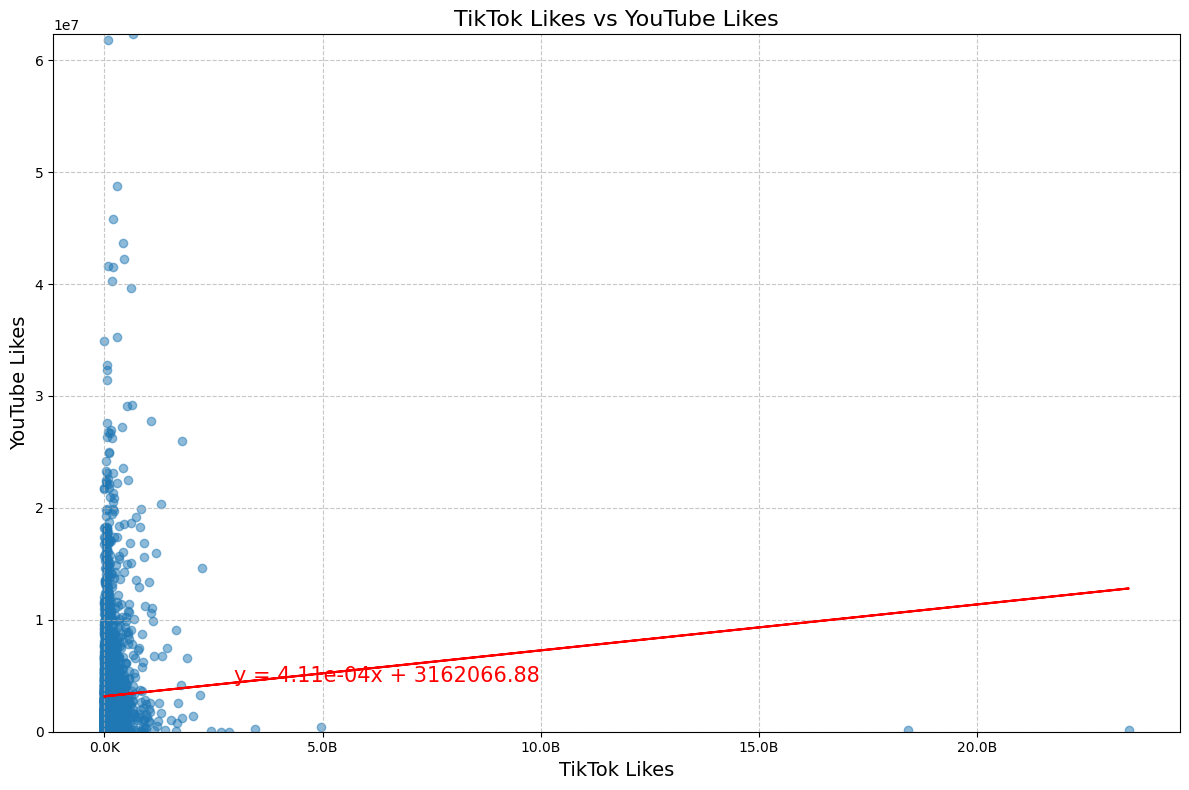

Correlation between TikTok Likes and YouTube Likes: 0.0472
R-squared: 0.0022


In [66]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# # YouTube Likes vs TikTok Views
# # Does high TikTok likes correlate to high YouTube likes?
# # Add the linear regression equation and line to plot
x_values = youtube_likes_data_clean['TikTok Likes']
y_values = youtube_likes_data_clean['YouTube Likes']

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(x_values, y_values, alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
line = slope * youtube_likes_data_clean['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(youtube_likes_data_clean['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = youtube_likes_data_clean['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('YouTube Likes', fontsize=14)
plt.title('TikTok Likes vs YouTube Likes', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_likes = youtube_likes_data_clean['YouTube Likes'].max()
plt.ylim(0, max_likes)  # This sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = youtube_likes_data_clean['TikTok Likes'].corr(youtube_likes_data_clean['YouTube Likes'])
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")


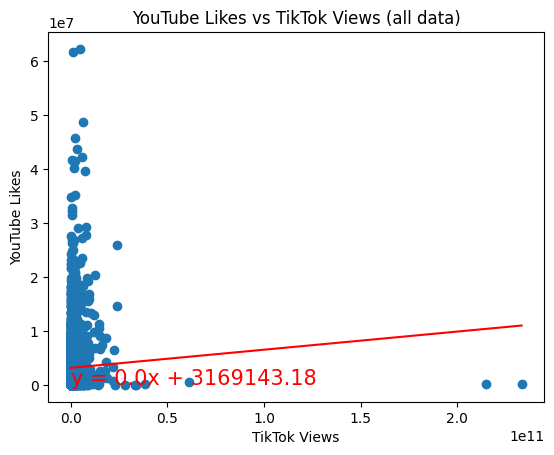

The r^2-value is: 0.00171982848971054


In [29]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['TikTok Views']
y_values = tik_tok_sort['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Views')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Views (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Switching the control**

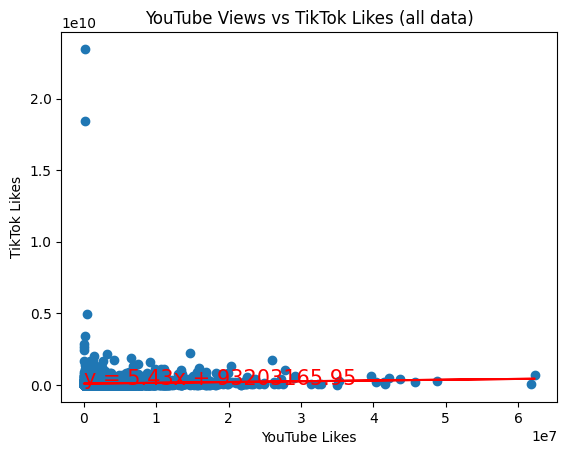

The r^2-value is: 0.0022281009644133454


In [31]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['YouTube Likes']
y_values = tik_tok_sort['TikTok Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Likes')
plt.title('YouTube Views vs TikTok Likes (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

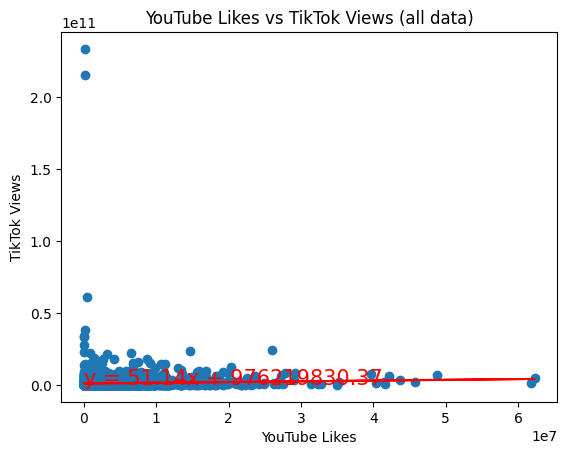

The r^2-value is: 0.00171982848971054


In [30]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['YouTube Likes']
y_values = tik_tok_sort['TikTok Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Views')
plt.title('YouTube Likes vs TikTok Views (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

##### Top-500 (in TikTok likes)

In [32]:
# Select relevant columns
df = top_500_tiktok_df[['TikTok Likes', 'YouTube Likes']]

# Compute the correlation
correlation = df['TikTok Likes'].corr(df['YouTube Likes'])

# Display the correlation
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation}")


Correlation between TikTok Likes and YouTube Likes: -0.037981046268237964


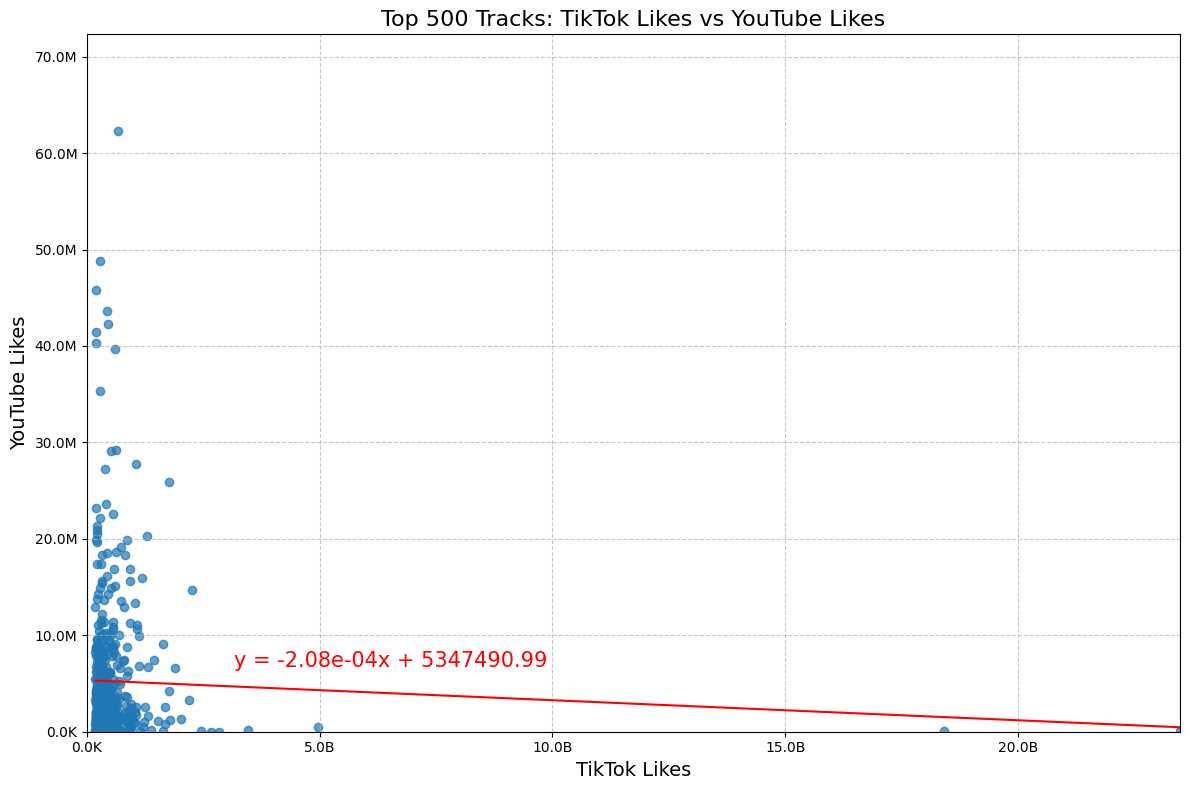

Correlation between TikTok Likes and YouTube Likes for top 500: -0.0380
R-squared: 0.0014

Statistics for Top 500 tracks:
Average TikTok Likes: 556,910,994
Average YouTube Likes: 5231665.35
Highest TikTok Likes: 23,474,223,833
Highest YouTube Likes: 62311179


In [83]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_tiktok_df['TikTok Likes'], 
            top_500_tiktok_df['YouTube Likes'], 
            alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_tiktok_df['TikTok Likes'], 
                                                            top_500_tiktok_df['YouTube Likes'])
line = slope * top_500_tiktok_df['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(top_500_tiktok_df['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500_tiktok_df['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('YouTube Likes', fontsize=14)
plt.title('Top 500 Tracks: TikTok Likes vs YouTube Likes', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits and invert y-axis
max_likes = top_500_tiktok_df['YouTube Likes'].max()
max_likes_tt = top_500_tiktok_df['TikTok Likes'].max()
plt.xlim(0, max_likes_tt + 10000000)  # This sets the y-axis range and inverts it
plt.ylim(0, max_likes + 10000000)  # This sets the y-axis range and inverts it

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_tiktok_df['TikTok Likes'].corr(top_500_tiktok_df['YouTube Likes'])
print(f"Correlation between TikTok Likes and YouTube Likes for top 500: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average TikTok Likes: {top_500_tiktok_df['TikTok Likes'].mean():,.0f}")
print(f"Average YouTube Likes: {top_500_tiktok_df['YouTube Likes'].mean():.2f}")
print(f"Highest TikTok Likes: {top_500_tiktok_df['TikTok Likes'].max():,.0f}")
print(f"Highest YouTube Likes: {top_500_tiktok_df['YouTube Likes'].max():.0f}")


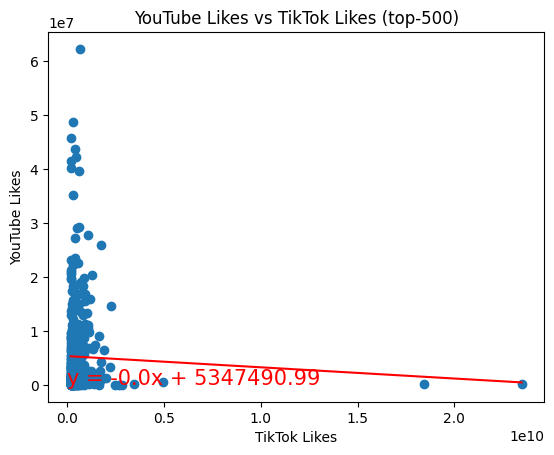

The r^2-value is: 0.0014425598756300335


In [58]:
# YouTube Likes vs TikTok Likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['TikTok Likes']
y_values = top_500_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Likes')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Likes (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

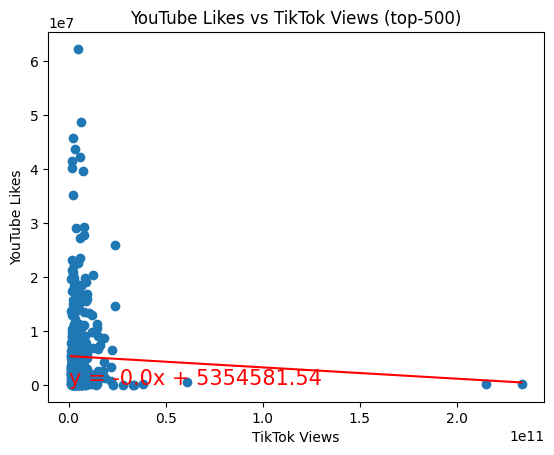

The r^2-value is: 0.001700482938075011


In [34]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['TikTok Views']
y_values = top_500_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Views')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Views (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Switching the control (top-500 by YouTube Likes)** 

In [ ]:
# Select relevant columns
df = top_500_tiktok_df[['TikTok Likes', 'YouTube Likes']]

# Compute the correlation
correlation = df['TikTok Likes'].corr(df['YouTube Likes'])

# Display the correlation
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation}")


Correlation between TikTok Likes and YouTube Likes: -0.037981046268237964


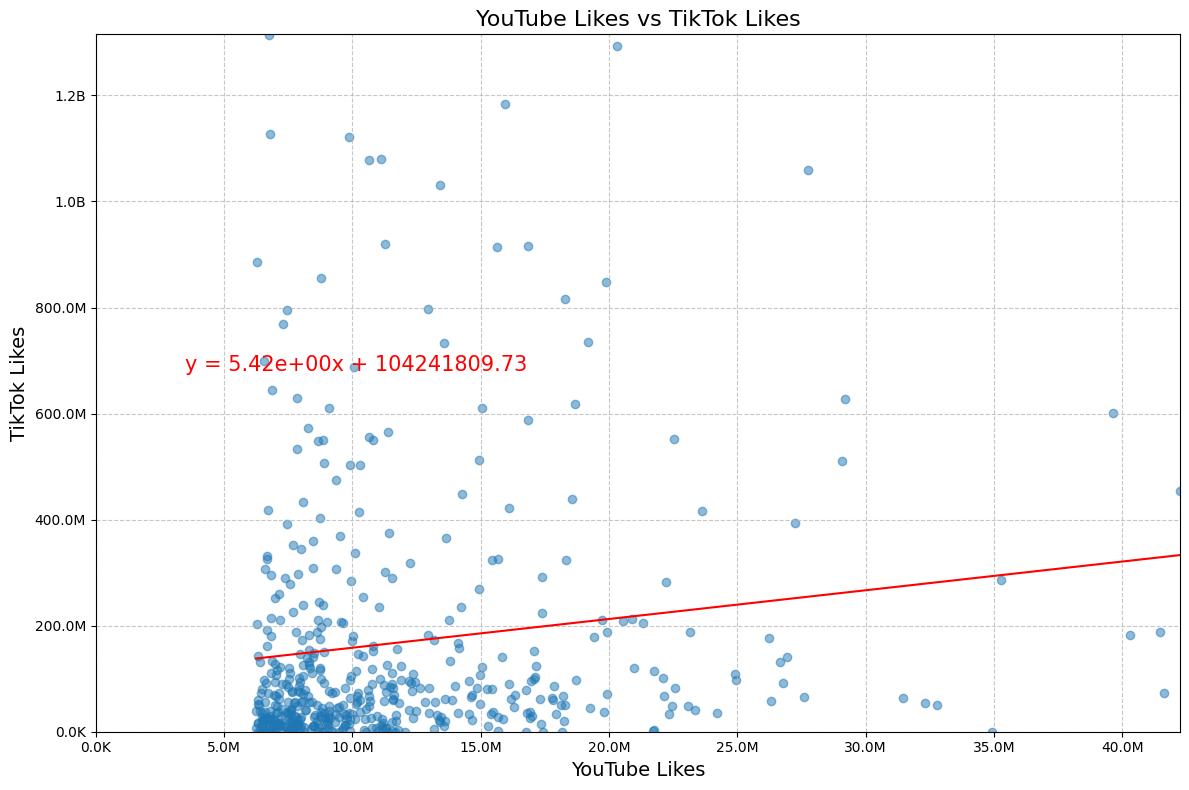

Correlation between YouTube Likes and TikTok Likes: 0.1423
R-squared: 0.0203


In [ ]:
# plt.figure(figsize=(12, 8))
# plt.scatter(top_500_youtube_df['YouTube Likes'], 
#             top_500_youtube_df['TikTok Likes'], 
#             alpha=0.5)  # alpha for transparency

# # Line of best fit
# slope, intercept, r_value, p_value, std_err = st.linregress(top_500_youtube_df['YouTube Likes'], 
#                                                             top_500_youtube_df['TikTok Likes'])
# line = slope * top_500_youtube_df['YouTube Likes'] + intercept
# plt.plot(top_500_youtube_df['YouTube Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# # Label the equation
# x_pos = top_500_youtube_df['YouTube Likes'].median()
# y_pos = slope * x_pos + intercept
# plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
#              (x_pos, y_pos), 
#              textcoords="offset points", 
#              xytext=(10, 200), 
#              ha='center', 
#              fontsize=15, 
#              color='red')

# # Labels and title
# plt.xlabel('YouTube Likes', fontsize=14)
# plt.ylabel('TikTok Likes', fontsize=14)
# plt.title('Top-500 Tracks: YouTube Likes vs TikTok Likes', fontsize=16)

# # Format y-axis ticks
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
# plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# # Dynamically adjust axis limits to remove blank space near origin
# min_x = top_500_youtube_df['YouTube Likes'].min()
# max_x = np.percentile(top_500_youtube_df['YouTube Likes'], 99) * 1.05
# plt.xlim(min_x * 0.9 if min_x > 0 else 0, max_x)

# min_y = top_500_youtube_df['TikTok Likes'].min()
# max_y = np.percentile(top_500_youtube_df['TikTok Likes'], 99) * 1.05
# plt.ylim(min_y * 0.9 if min_y > 0 else 0, max_y)

# # Grid and layout
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()

# plt.show()

# # Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_youtube_df['YouTube Likes'], 
            top_500_youtube_df['TikTok Likes'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_youtube_df['YouTube Likes'], 
                                                            top_500_youtube_df['TikTok Likes'])
line = slope * top_500_youtube_df['YouTube Likes'] + intercept

# Plot the line of best fit
plt.plot(top_500_youtube_df['YouTube Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500_youtube_df['YouTube Likes'].median()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(10, 200), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('YouTube Likes', fontsize=14)
plt.ylabel('TikTok Likes', fontsize=14)
plt.title('Top 500 Tracks: YouTube Likes vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits (cap at 99th percentile to remove extreme outliers)
max_likes_youtube = np.percentile(top_500_youtube_df['YouTube Likes'], 99)
plt.xlim(0, max_likes_youtube)

# Set y-axis limits (cap at 99th percentile to remove extreme outliers)
max_likes_tiktok = np.percentile(top_500_youtube_df['TikTok Likes'], 99)
plt.ylim(0, max_likes_tiktok)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = top_500_youtube_df['YouTube Likes'].corr(top_500_youtube_df['TikTok Likes'])
print(f"Correlation between YouTube Likes and TikTok Likes: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

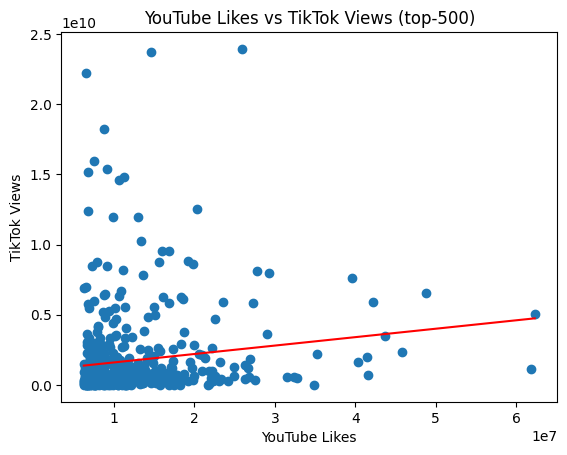

The r^2-value is: 0.019777350504129407


In [36]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_youtube_df['YouTube Likes']
y_values = top_500_youtube_df['TikTok Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Views')
plt.title('YouTube Likes vs TikTok Views (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

##### Top-10 (in TikTok likes)

In [38]:
# Select relevant columns
df = top_10_tiktok_df[['TikTok Likes', 'YouTube Likes']]

# Compute the correlation
correlation = df['TikTok Likes'].corr(df['YouTube Likes'])

# Display the correlation
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation}")


Correlation between TikTok Likes and YouTube Likes: -0.2516123908867939


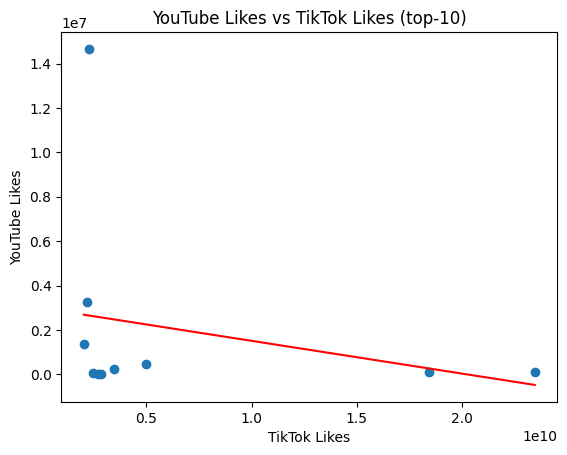

The r^2-value is: 0.06330879524776875


In [39]:
# YouTube Likes vs TikTok Likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['TikTok Likes']
y_values = top_10_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Likes')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Likes (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

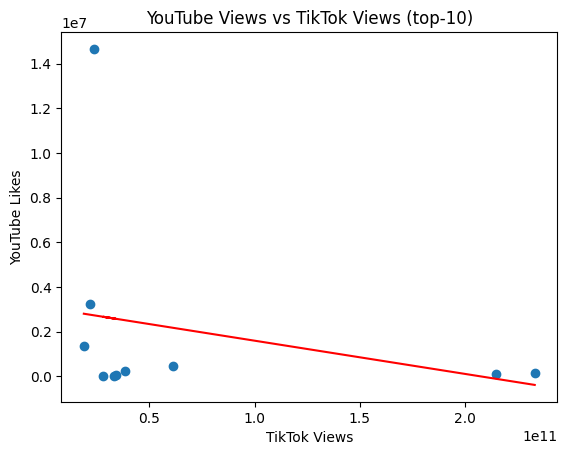

The r^2-value is: 0.0714039740045865


In [40]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['TikTok Views']
y_values = top_10_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Views')
plt.ylabel('YouTube Likes')
plt.title('YouTube Views vs TikTok Views (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Switching the control (top-10 by YouTube Likes)**

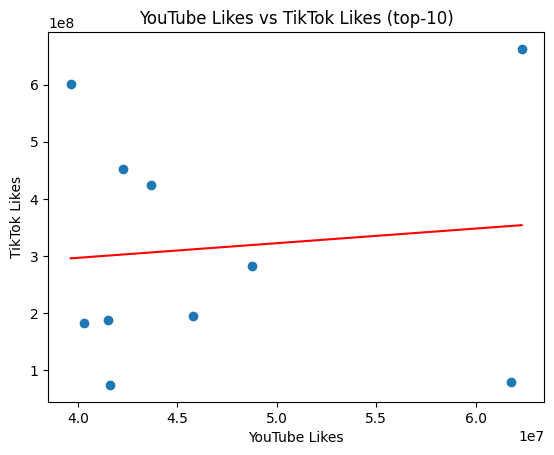

The r^2-value is: 0.010737670165216444


In [41]:
# YouTube Likes vs TikTok likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_10_youtube_df['YouTube Likes']
y_values = top_10_youtube_df['TikTok Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Likes')
plt.title('YouTube Likes vs TikTok Likes (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

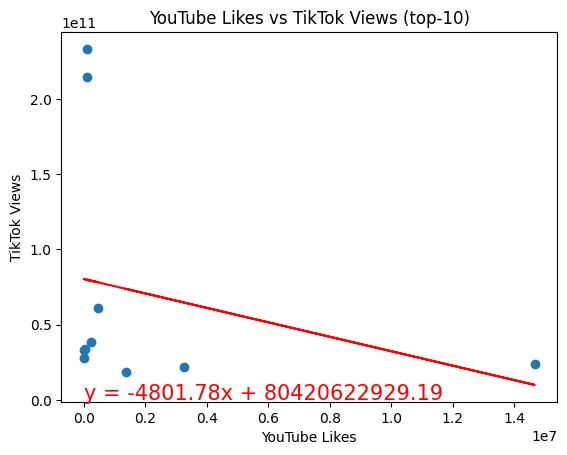

The r^2-value is: 0.0714039740045865


In [42]:
# YouTube Likes vs TikTok views
# Does high YouTube likes correlated to high TikTok views?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['YouTube Likes']
y_values = top_10_tiktok_df['TikTok Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Views')
plt.title('YouTube Likes vs TikTok Views (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")